In [164]:
%load_ext autoreload
%autoreload 2

from pad_autoencoder import autoencoder, inputModel
from tensorflow import keras
from tensorflow.ragged import constant as raggedTensor
from tensorflow.sparse import SparseTensor as sparseTensor
plot_model = keras.utils.plot_model

Model = keras.models.Model
Input = keras.layers.Input
LSTM = keras.layers.LSTM
Dense = keras.layers.Dense
Embedding = keras.layers.Embedding
Concatenate = keras.layers.Concatenate
Reshape = keras.layers.Reshape
Permute = keras.layers.Permute

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
latent_dim = 50
num_net_embedded_dim = 10
num_net_tokens = 100 #TODO find max number of net names in dataset
num_layers = 32
num_pos_tokens = 2
num_size_tokens = 2

num_decoder_tokens = num_net_embedded_dim + num_layers + num_pos_tokens + num_size_tokens

[<tf.Tensor 'masking_24/mul:0' shape=(None, None, 32) dtype=float32>, <tf.Tensor 'size-eg_9:0' shape=(None, None, 2) dtype=float32>, <tf.Tensor 'pos-eg_9:0' shape=(None, None, 2) dtype=float32>, <tf.Tensor 'embedding_54/embedding_lookup/Identity_1:0' shape=(None, None, 10) dtype=float32>]


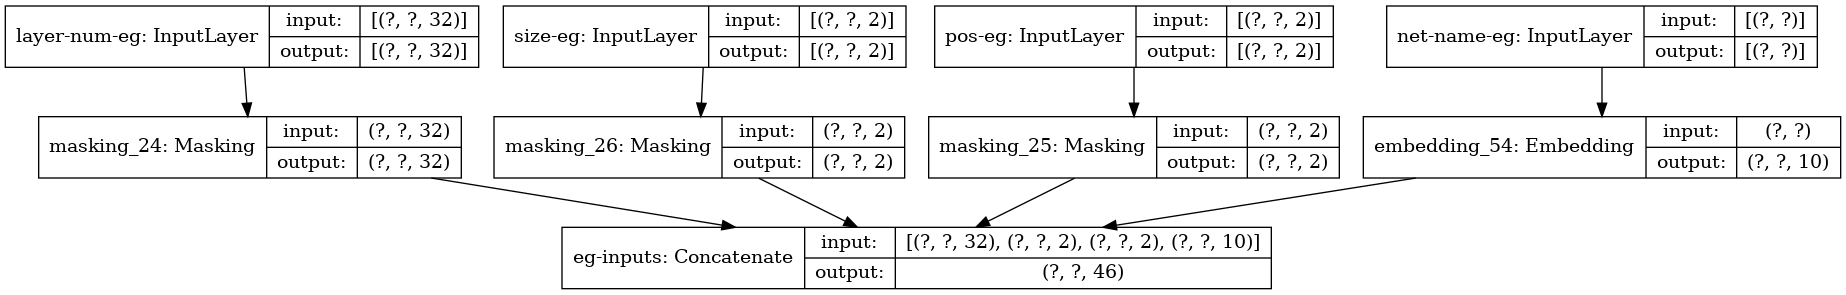

In [166]:
input_list, input_conc = inputModel("eg")
plot_model(Model(input_list, input_conc), "nets embedded input.png", show_shapes=True, expand_nested=True)

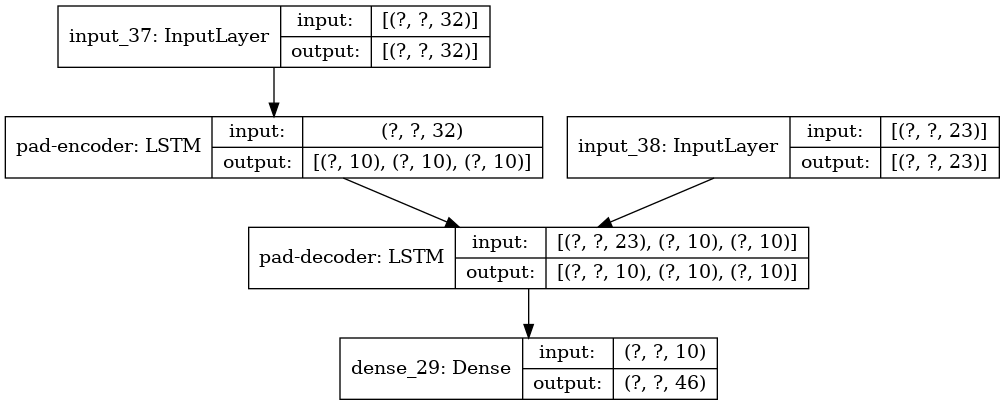

In [167]:
encoder_input = Input(shape=(None, 32, ))
decoder_input = Input(shape=(None, 23, ))
out = autoencoder([encoder_input, decoder_input]),
plot_model(Model([encoder_input, decoder_input], out), "autoencoder.png", show_shapes=True, expand_nested=True)

[<tf.Tensor 'masking_27/mul:0' shape=(None, None, 32) dtype=float32>, <tf.Tensor 'size-encoder_16:0' shape=(None, None, 2) dtype=float32>, <tf.Tensor 'pos-encoder_16:0' shape=(None, None, 2) dtype=float32>, <tf.Tensor 'embedding_55/embedding_lookup/Identity_1:0' shape=(None, None, 10) dtype=float32>]
[<tf.Tensor 'masking_30/mul:0' shape=(None, None, 32) dtype=float32>, <tf.Tensor 'size-decoder_14:0' shape=(None, None, 2) dtype=float32>, <tf.Tensor 'pos-decoder_14:0' shape=(None, None, 2) dtype=float32>, <tf.Tensor 'embedding_56/embedding_lookup/Identity_1:0' shape=(None, None, 10) dtype=float32>]


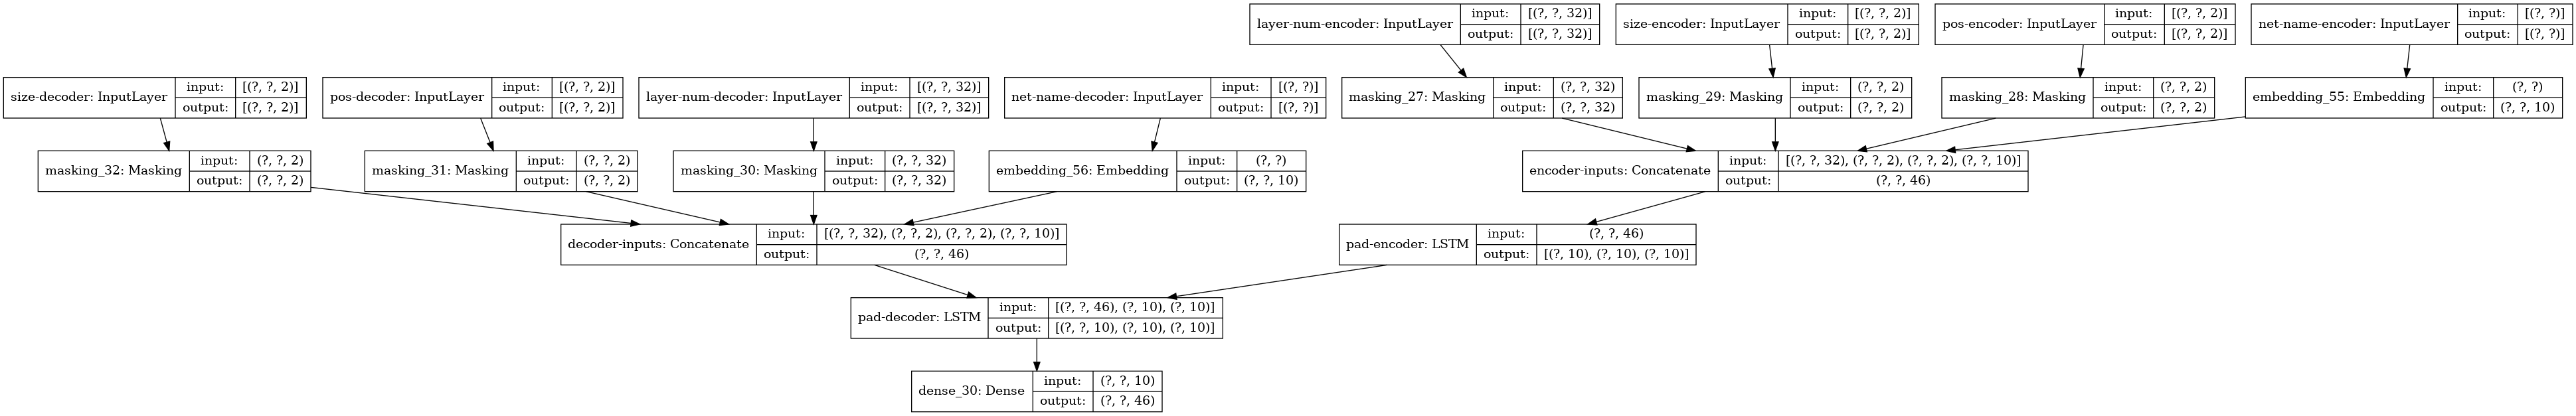

In [168]:
encoder_input_list, encoder_input_conc = inputModel("encoder")
decoder_input_list, decoder_input_conc = inputModel("decoder")

pad_out = autoencoder([encoder_input_conc, decoder_input_conc])
pad_autoencoder = Model(encoder_input_list + decoder_input_list, pad_out)
plot_model(pad_autoencoder, "pad_autoencoder.png", show_shapes=True, expand_nested=True)

In [169]:
arrayType = sparseTensor

encoder_input_data_pos= arrayType([[[10, 12],[5, 10],[6, 1000.3]], [[2, 3], [32, 12], [0,0]], [[12, 233], [0,0], [0,0]] ])
encoder_input_data_size= arrayType([[[1, 1],[5, 110],[62, 13000.3]], [[21, 13], [2, 1], [0,0]], [[1,2], [0,0], [0,0]] ]) 
encoder_input_data_layer= arrayType([ [1, 3, 2], [1, 2, 0], [2, 0, 0]])
encoder_input_data_net= arrayType([ ["VIN", "GND", "R1"], ["G", "VIN", 0], ["C2", 0, 0]])

num_pcbs = 2

inputData = {
    "layer-num-encoder": encoder_input_data_pos,
    "net-name-encoder": encoder_input_data_net,
    "pos-encoder": encoder_input_data_pos,
    "size-encoder": encoder_input_data_size,

    "layer-num-decoder": encoder_input_data_pos,
    "net-name-decoder": encoder_input_data_net,
    "pos-decoder": encoder_input_data_pos,
    "size-decoder": encoder_input_data_size
}

targetOutputData = [ list(zip(encoder_input_data_pos[i], encoder_input_data_size[i], encoder_input_data_layer[i], encoder_input_data_net[i])) for i in range(2) ]

print(inputData)
print(targetOutputData)

TypeError: __init__() missing 2 required positional arguments: 'values' and 'dense_shape'

In [ ]:
pad_autoencoder.compile(optimizer="rmsprop", loss='categorical_loss')
pad_autoencoder.fit(inputData, targetOutputData,
epochs=1,
validation_split=0)

In [ ]:

def encodeNetName(net):
    encoded_net = one_hot_text(net, net_vocab_size)
    padding = np.zeros(max_net_char_len-len(encoded_net),dtype=np.uintc)
    return np.append(encoded_net,padding)

In [ ]:
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
Masking = keras.layers.Masking

input1 = Masking(Input(shape=(20,)))
input2 = Input(shape=(20,))
x1 = input1
x2 = Embedding(10000, 10, input_length=20, mask_zero=True)(input2)
x = concatenate([x1, x2])
x = Dense(8, activation='softmax')(x)
model = Model(inputs=[input1, input2], outputs=x)